In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import scipy.constants as const
import pandas as pd
from healpy.visufunc import projscatter
import matplotlib as mpl

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)
mpl.rc('image', cmap='RdBu_r')

In [3]:
r = hp.rotator.Rotator(coord = ('C', 'G'))

In [4]:
NPIX = hp.nside2npix(2**8)

In [5]:
df = pd.read_csv('pixel/pixel_list.csv')

start_dist = df['start']
end_dist = df['end']

In [6]:
cad = pd.read_csv('pixel/obs_cadence.csv')

In [7]:
m = np.zeros(NPIX)

for i in range(len(df)):
    for j in range(start_dist[i], end_dist[i] + 1):
        m[j] = cad['0'][i]

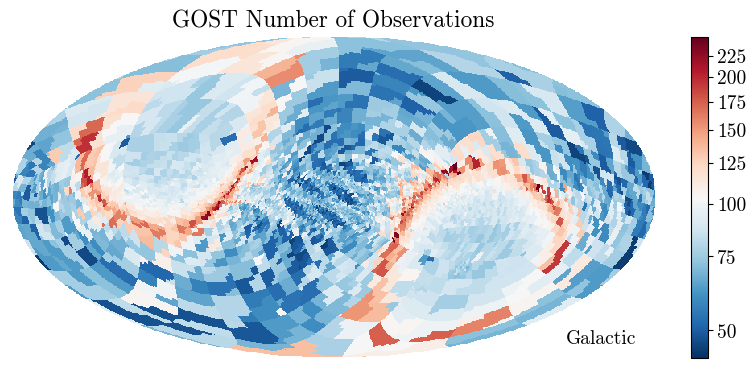

In [9]:
fig, ax1 = plt.subplots(ncols=1, figsize = (9,5))

plt.axes(ax1)
hp.mollview(m, nest = True, cbar = False, norm = 'log', coord = ('C','G'),
             title = 'GOST Number of Observations', 
            format='%.2e', format2='%.2e', hold = True)

fig1 = plt.gcf()
ax = plt.gca()

image = ax.get_images()[0]
cmap = fig1.colorbar(image, ax=ax, fraction = 0.023) 

#plt.savefig('gost_cadence.pdf', bbox_inches='tight', dpi = 500)